# <h1><center>**`Employee Salaries Project`**</center></h1>

### **`Problem Statement`**


To predict the salary of employee based on the information provided in the dataset.

- ### `How will the company profit from this solution?`
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

- ### `How will the employee profit from this solution?`

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor.
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.




### `Dataset Desciption`

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the train_dataset, train_salaries, test_dataset
train_data = pd.read_csv('/content/salary_train_dataset.csv')
train_data_salaries = pd.read_csv('/content/salary_train_salaries.csv')
test_data = pd.read_csv('/content/salary_train_salaries.csv')

In [ ]:
# print head of train data
train_data.head()


jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH             10.0                 83.0  
1      WEB              3.0                 73.0  
2   HEALTH             10.0                 38.0  
3     AUTO              8.0                 17.0  
4  FINANCE              8.0                 16.0

In [ ]:
# print head of train data salaries
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [ ]:
# print test head

test_data.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [ ]:
# Adding salary data to train_dataset
train_data['salary']=train_data_salaries['salary']


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [ ]:
# get all column names
train_data.columns



Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## more about the data in the columns like data type it contains and total samples of each

In [ ]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161012 entries, 0 to 161011
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   jobId                161012 non-null  object 
 1   companyId            161012 non-null  object 
 2   jobType              161012 non-null  object 
 3   degree               161012 non-null  object 
 4   major                161011 non-null  object 
 5   industry             161011 non-null  object 
 6   yearsExperience      161011 non-null  float64
 7   milesFromMetropolis  161011 non-null  float64
 8   salary               161012 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 11.1+ MB


In [ ]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406314 entries, 0 to 406313
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   jobId   406314 non-null  object
 1   salary  406314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ MB


1. After checking the Dtypes of all the columns
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns

train_data.describe()


yearsExperience  milesFromMetropolis         salary
count    161011.000000        161011.000000  161012.000000
mean         11.963201            49.426424     115.953985
std           7.209264            28.907816      38.771239
min           0.000000             0.000000       0.000000
25%           6.000000            24.000000      88.000000
50%          12.000000            49.000000     114.000000
75%          18.000000            74.000000     141.000000
max          24.000000            99.000000     292.000000

In [ ]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_data.describe()


salary
count  406314.000000
mean      116.063810
std        38.768058
min         0.000000
25%        88.000000
50%       114.000000
75%       141.000000
max       301.000000

## total number of samples in the dataset using the len() function

In [ ]:
# len of train and test dataset
print('train data length:',len(test_data))
print('test data length:',len(test_data))


train data length: 406314
test data length: 406314


## Get unique values

In [ ]:
# get how many unique values are in train_dataset

for x in train_data.columns:
  print(x,':',len(train_data[x].unique()))


jobId : 161012
companyId : 63
jobType : 8
degree : 5
major : 10
industry : 8
yearsExperience : 26
milesFromMetropolis : 101
salary : 268


In [ ]:
# get how many unique values are in test_dataset

for x in test_data.columns:
  print(x,':',len(test_data[x].unique()))


jobId : 406314
salary : 276


## Counting the total number of missing values¶

In [ ]:
# Check for missing values in all the columnns of the train_dataset

train_data.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  1
industry               1
yearsExperience        1
milesFromMetropolis    1
salary                 0
dtype: int64

In [ ]:
 # Check for missing values in all the columnns of the test_dataset
test_data.isnull().sum()



jobId     0
salary    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [ ]:
# drop jobId and companyId from train_dataset
train_data =train_data.drop(['jobId','companyId'],axis=1)

train_data

jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH             10.0   
1                  CEO  HIGH_SCHOOL       NONE        WEB              3.0   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH             10.0   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO              8.0   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE              8.0   
...                ...          ...        ...        ...              ...   
161007         MANAGER  HIGH_SCHOOL       NONE        WEB             15.0   
161008         JANITOR         NONE       NONE       AUTO             12.0   
161009             CEO     DOCTORAL       MATH  EDUCATION              8.0   
161010  VICE_PRESIDENT      MASTERS  CHEMISTRY    FINANCE              6.0   
161011         JANITOR         NONE        NaN        NaN              NaN   

        milesFromMetropolis  salary  
0                      83.0     130  
1                      73.0     101  
2                      38.0     137  
3                      17.0     142  
4                      16.0     163  
...                     ...     ...  
161007                 39.0      98  
161008                 95.0      54  
161009                 42.0     111  
161010                 62.0     136  
161011                  NaN      88  

[161012 rows x 7 columns]

In [ ]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(['jobId','companyId'],axis=1)
test_data

KeyError: ignored

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [ ]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for x in train_data.columns:
  if train_data[x].dtype =='object':
    categorical_list.append(x)
  elif train_data[x].dtype=='int64':
      var_list.append(x)
  elif train_data[x].dtype=='float':
        var_list.append(x)




## Correlation Matrix

In [ ]:
# Correlation metrix using pandas
corr =train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)




## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

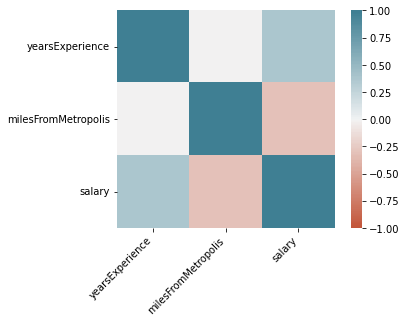

In [ ]:
# Correlation metrix using seaborn
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,
cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');



## Chi-square Test

In [ ]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):

    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])

    #Observed Values
    observed_values = contingency_table.values

    #Expected Values
    b =chi2_contingency(contingency_table)
    expected_values = b[3]

    #Degree of Freedom
    no_of_rows = len( contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)

    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)

    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)

    #p-value
    p_value =1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)

    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset

for x in categorical_list:
  for i in categorical_list:
    if i !=x:
      print('chi-square test on: ',x,' ',i,'\n')
      perform_chi_square_test(x,i)
      print('--------------------------------------\n')


chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  8137.923388119016
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
--------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  2714.6584022158477
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
--------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  15.957670268785664
critical_value: 58.12403768086803
p-value: 0.9999093437820447
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship betwe

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot

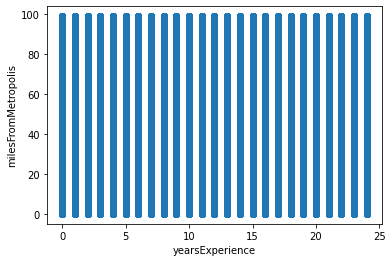

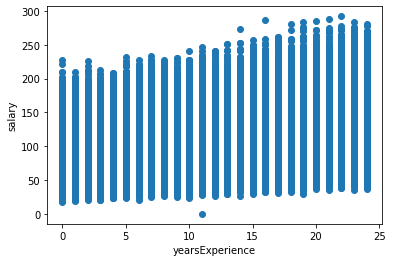

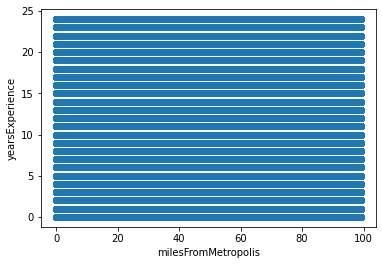

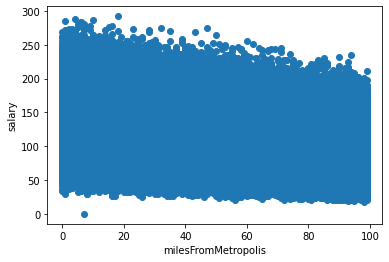

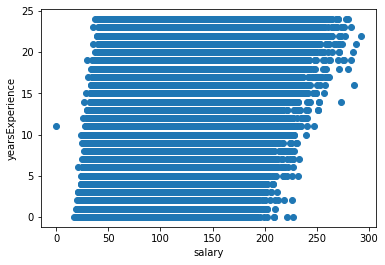

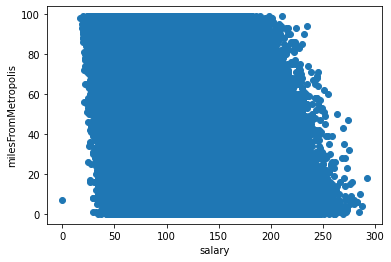

In [ ]:
# Scatter plot using matplotlib
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x],train_data[y])
  plt.show()
    # code below


# Loop through the different columns
for i in var_list:
  for j in var_list:
    if i !=j:
      plot_scatter(i,j)



From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dccb1da50>,
      dtype=object)

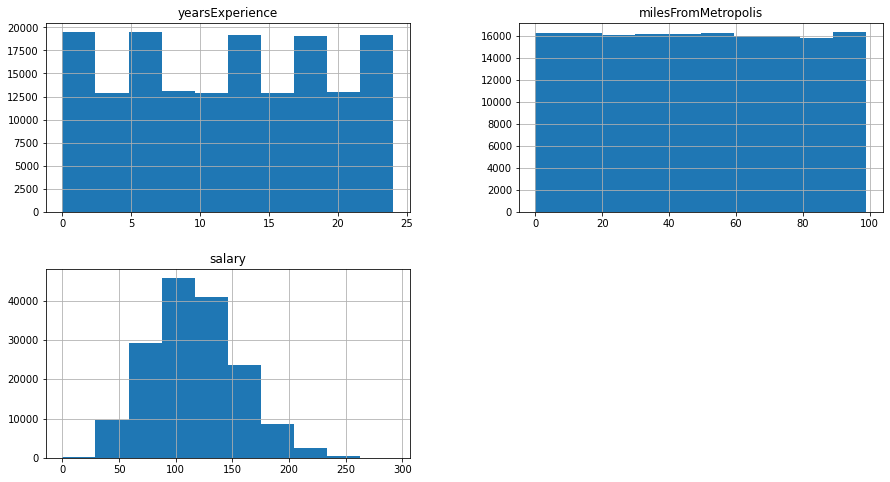

In [ ]:
# Histogram using pandas

train_data.hist(figsize=(15,8))


From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## groupby

You can use groupby to chunk up your data into subsets for further analysis.

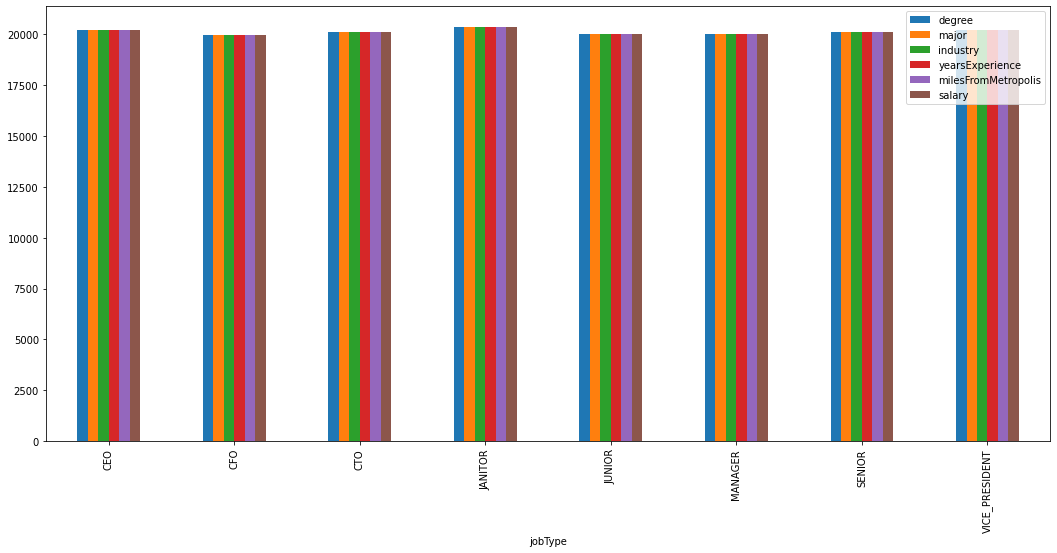

In [ ]:
# goup data by jobType and plot count plot
train_data.groupby('jobType').count().plot(kind='bar', figsize=(18, 8))



from above graph:
1. All data for each jobType is distributed equally.

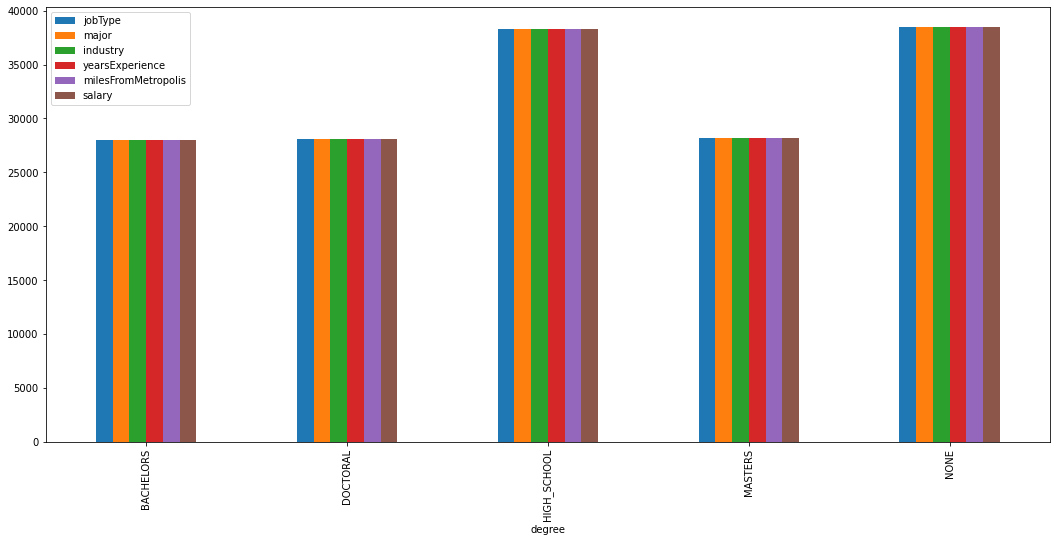

In [ ]:
# goup data by degree and plot count plot
train_data.groupby('degree').count().plot(kind='bar', figsize=(18, 8))


From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

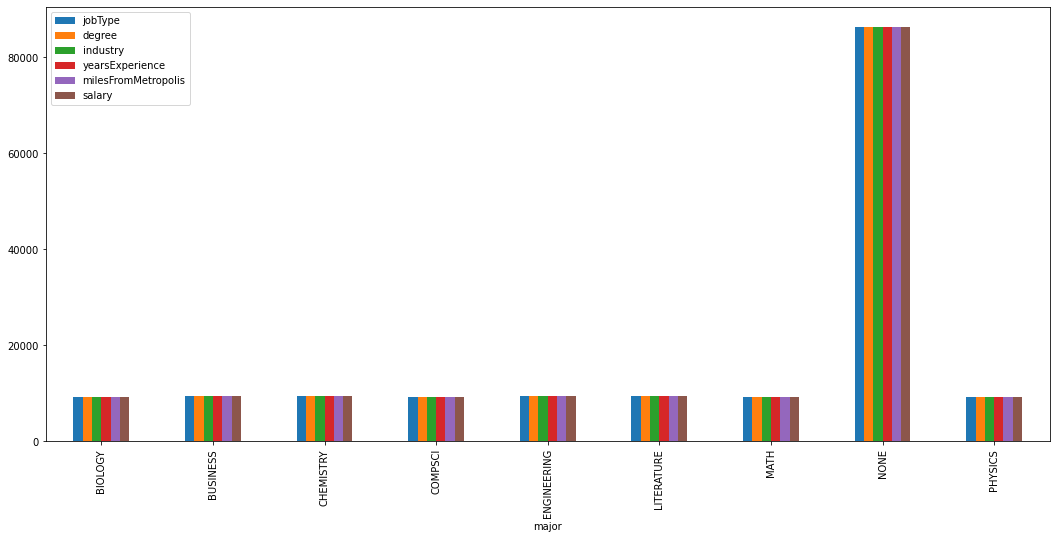

In [ ]:
# goup data by major and plot count plot

train_data.groupby('major').count().plot(kind='bar', figsize=(18, 8))


From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's


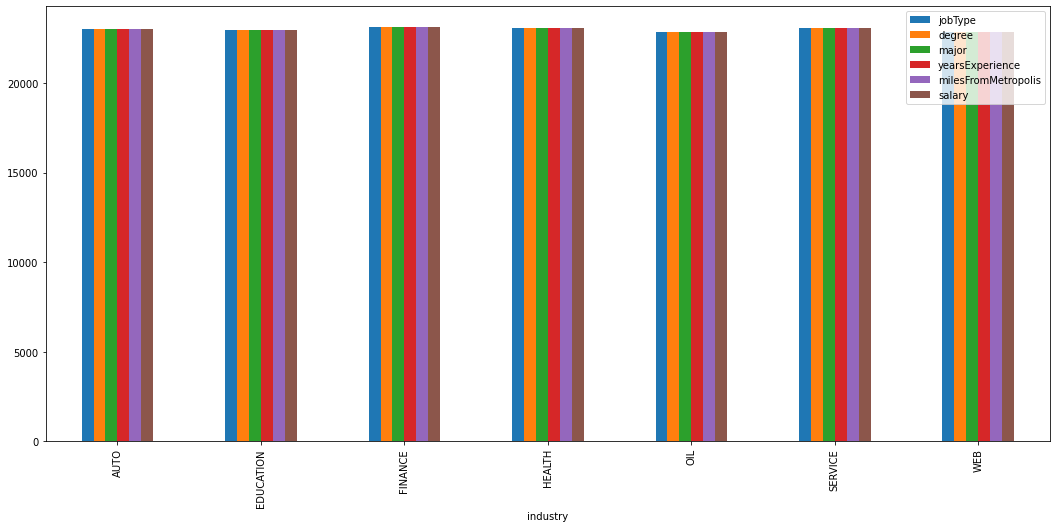

In [ ]:
# goup data by industry and plot count plot
train_data.groupby('industry').count().plot(kind='bar', figsize=(18, 8))



from above graph:
1. All data for each industry is distributed equally.

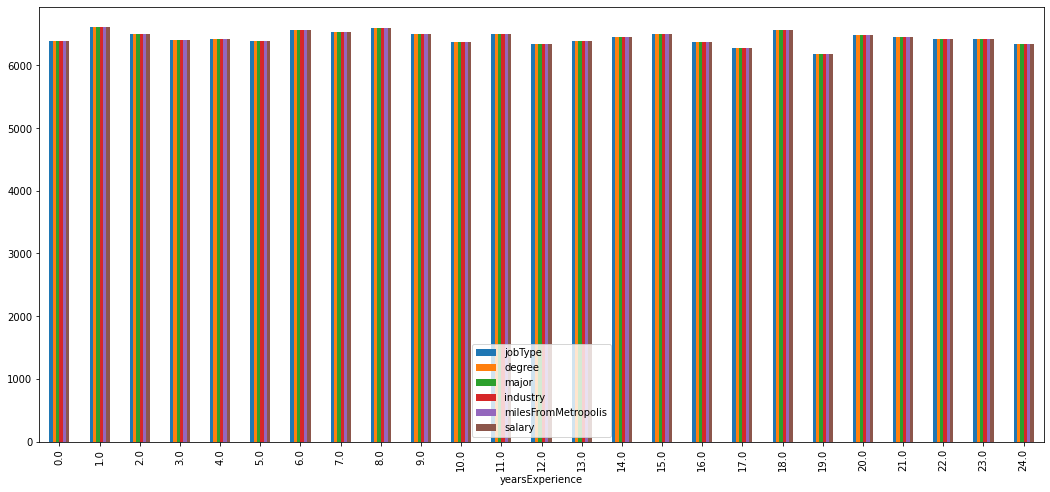

In [ ]:
# goup data by yearsExperience and plot count plot
train_data.groupby('yearsExperience').count().plot(kind='bar', figsize=(18, 8))


from above graph:
1. All data for each yearsExperience is distributed almost equally.

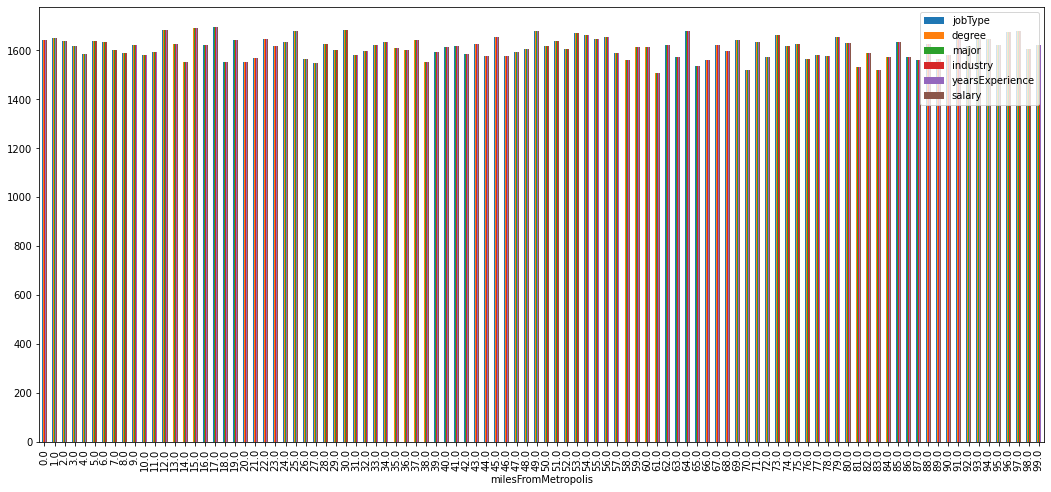

In [ ]:
# goup data by milesFromMetropolis and plot count plot
train_data.groupby('milesFromMetropolis').count().plot(kind='bar', figsize=(18 ,8))



from above graph:
1. All data for each milesFromMetropolis is distributed almost equally.

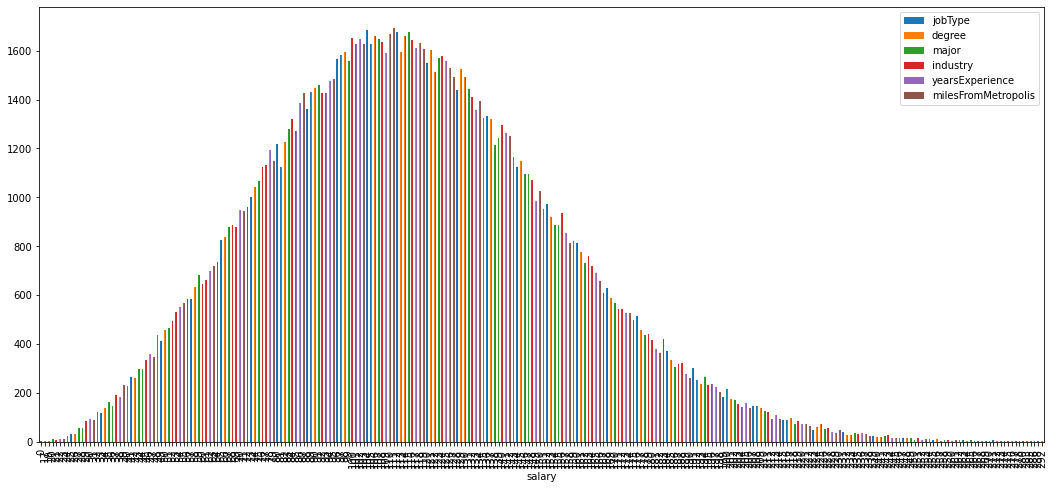

In [ ]:
# goup data by salary and plot count plot
train_data.groupby('salary').count().plot(kind='bar', figsize=(18 ,8))



from above graph:
1. All data for each value of salary is distributed symmetrical and unimodel.

## Box Plot

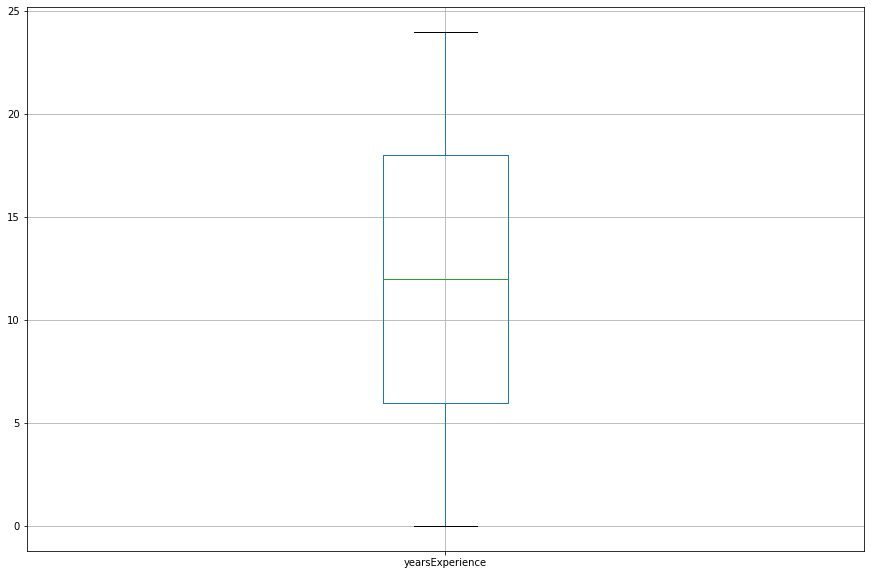

In [ ]:
# box plot using pandas
# box plot for yearsExperience column
train_data.boxplot(column='yearsExperience',figsize=(15,10))


from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

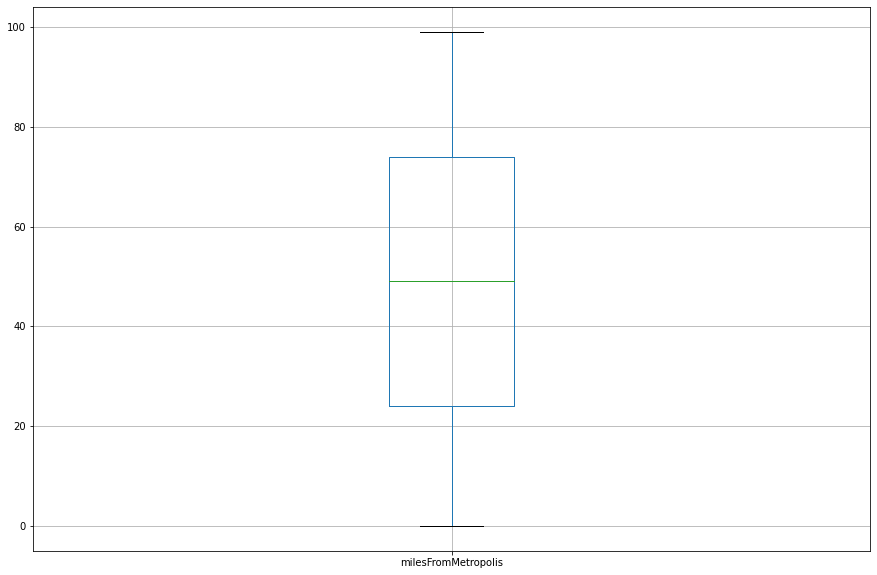

In [ ]:
# box plot using pandas
# box plot for milesFromMetropolies column
train_data.boxplot(column='milesFromMetropolis',figsize=(15,10))


from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

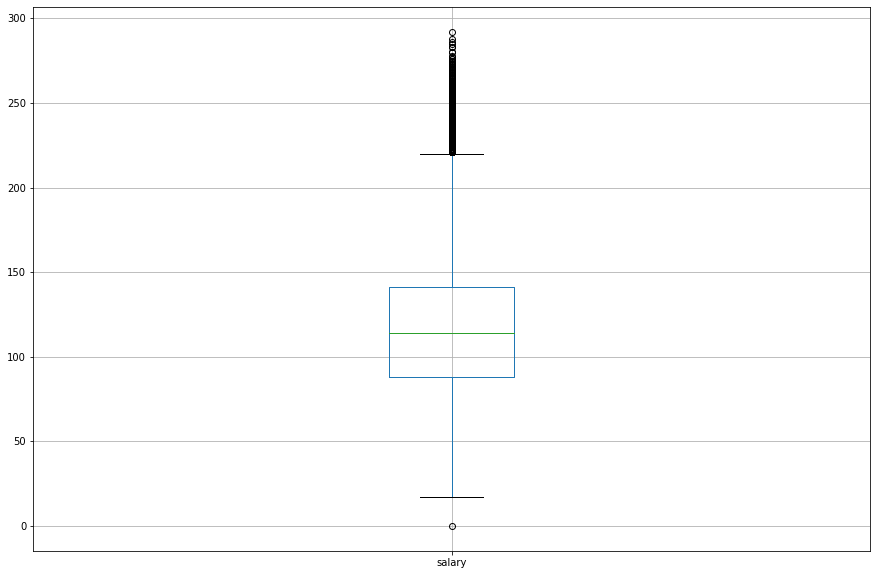

In [ ]:
# box plot using pandas
# box plot for salary column
train_data.boxplot(column='salary', figsize=(15, 10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

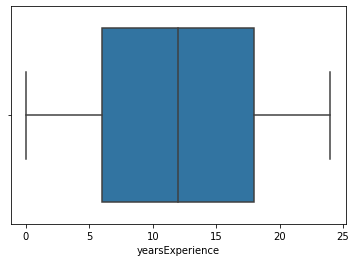

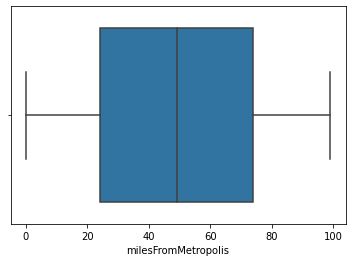

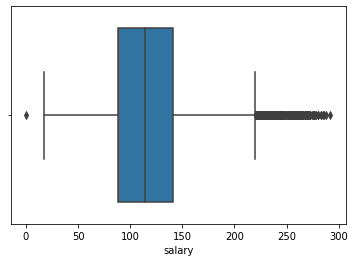

In [ ]:
# box plot using seaborn
# box plot for yearsExperience column
# box plot for mileFromMetropolis column
# box plot for salary column

for x in var_list:
  sns.boxplot(train_data[x])
  plt.show()



## Violin Plot


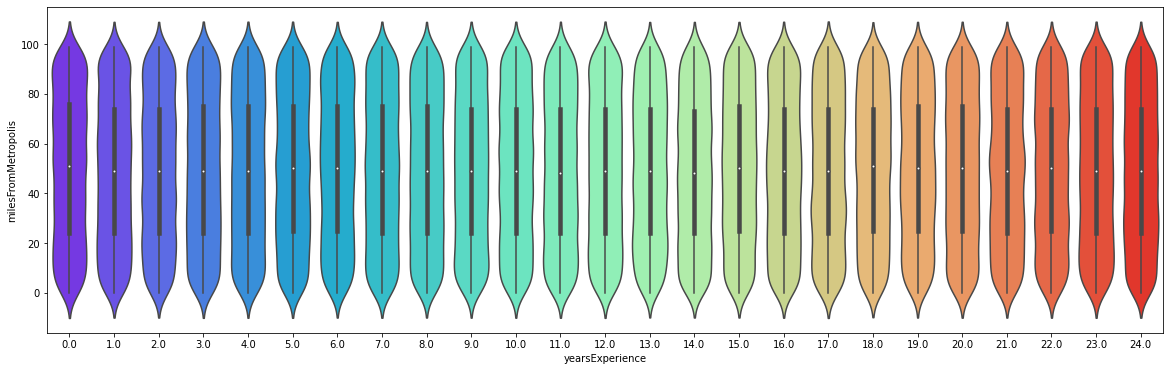

In [ ]:
# violin plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='milesFromMetropolis',data=train_data,palette='rainbow')



from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

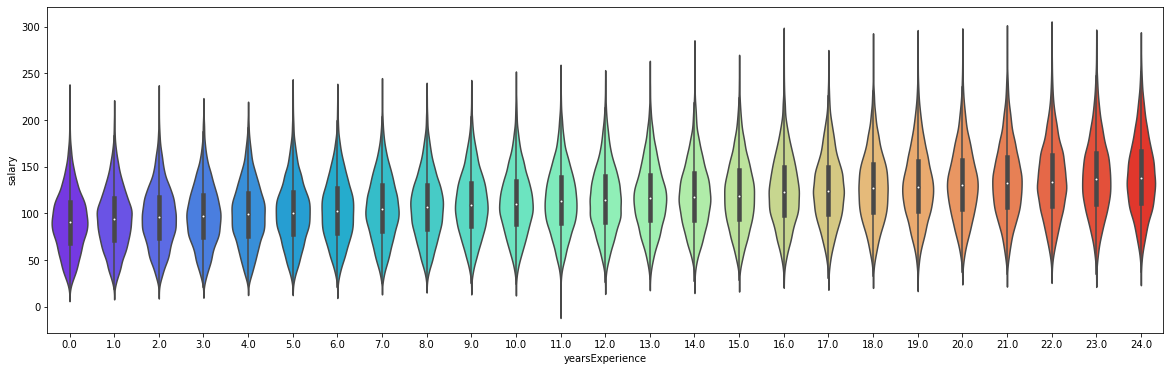

In [ ]:
# violin plot for yearsExperience and salary columns

plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')



from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

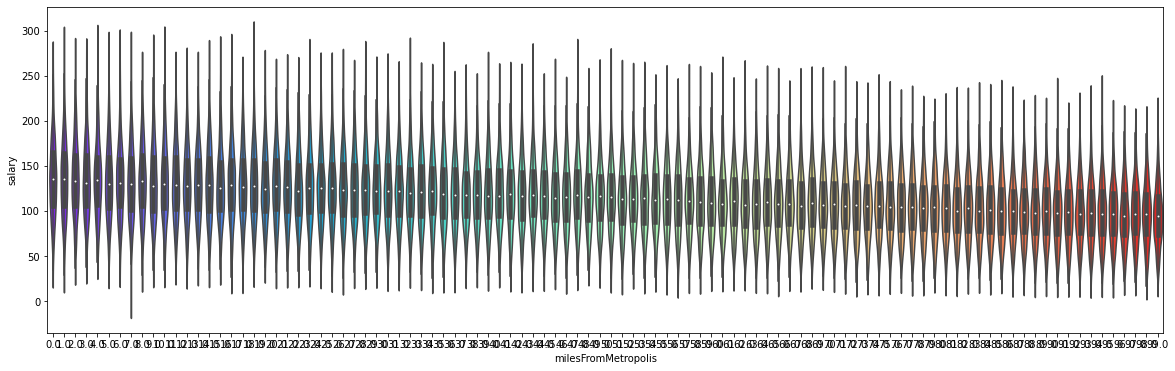

In [ ]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')


from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot




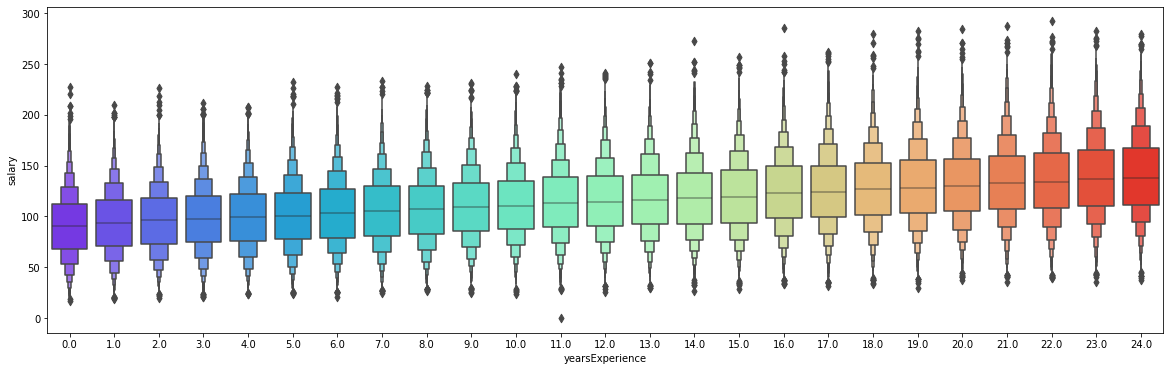

In [ ]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='salary',data=train_data,palette='rainbow')


from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

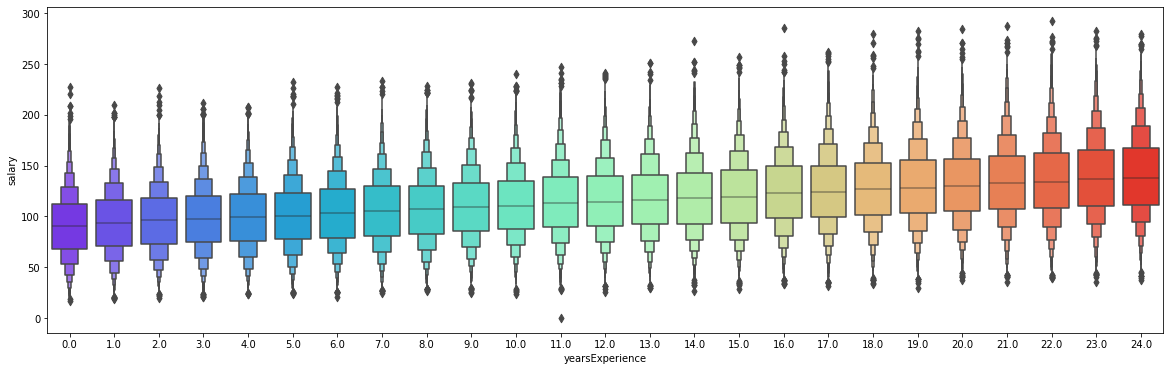

In [ ]:
# boxen plot for yearsExperience and milesFromMetropolis columns

plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='salary',data=train_data,palette='rainbow')




from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

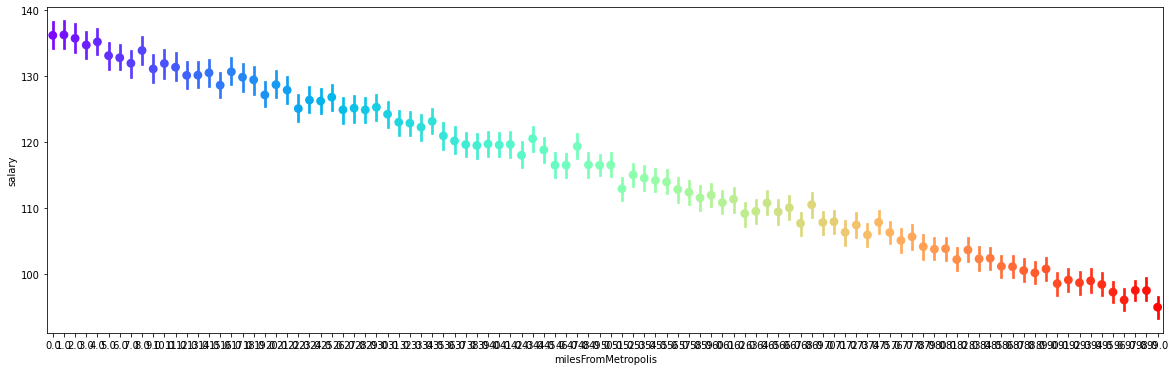

In [ ]:
# boxen plot for milesFromMetropolis from salary columns

plt.figure(figsize=(20,6))
sns.pointplot(x='milesFromMetropolis', y='salary',data=train_data,palette='rainbow')


from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Point Plot


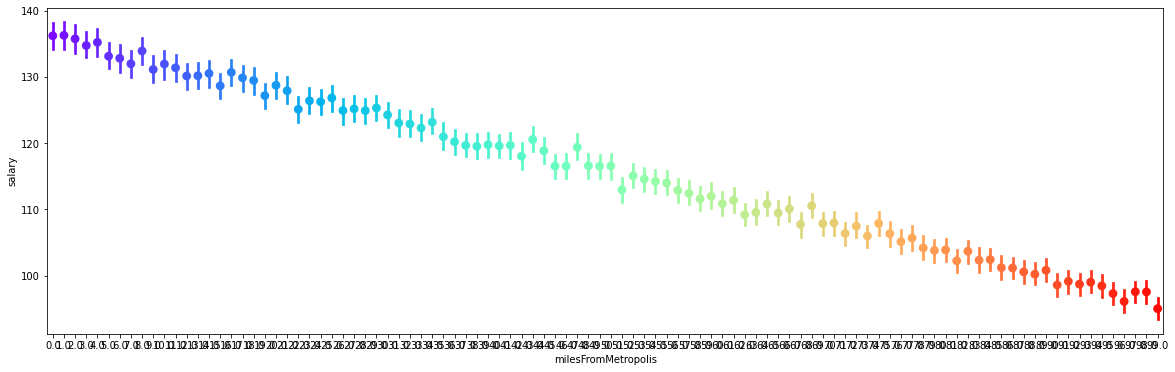

In [ ]:
# point plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.pointplot(x='milesFromMetropolis', y='salary',data=train_data,palette='rainbow')




From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

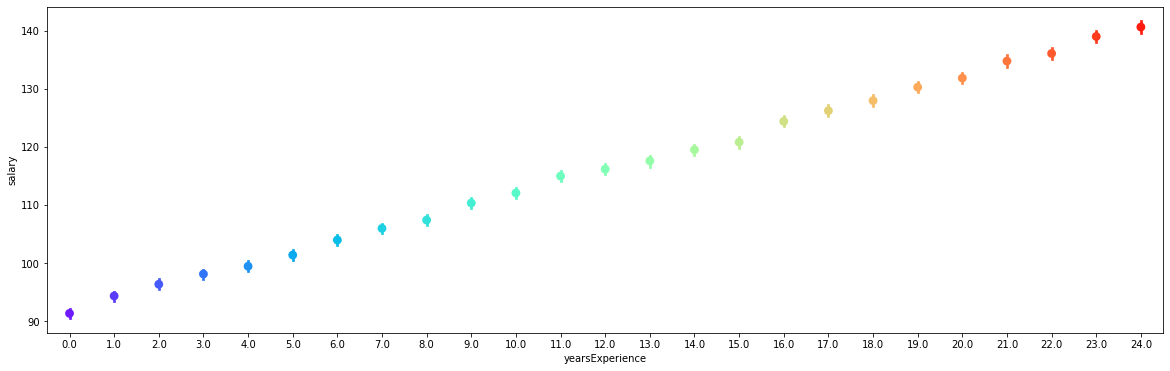

In [ ]:
# point plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.pointplot(x='yearsExperience', y='salary',data=train_data,palette='rainbow')





From above point plot

There is a increase in salary when there is a increase in yearsExperience

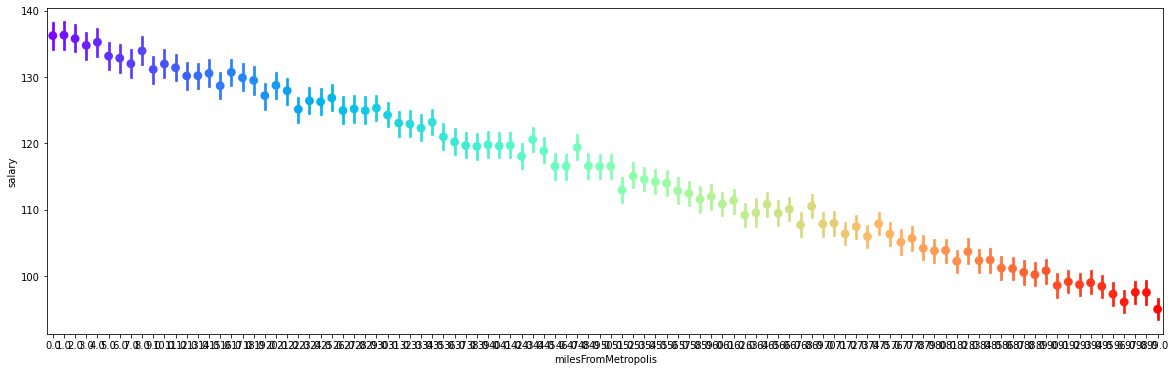

In [ ]:
# point plot for milesFromMetropolis from salary columns

plt.figure(figsize=(20,6))
sns.pointplot(x='milesFromMetropolis', y='salary',data=train_data,palette='rainbow')



From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

## Count Plot

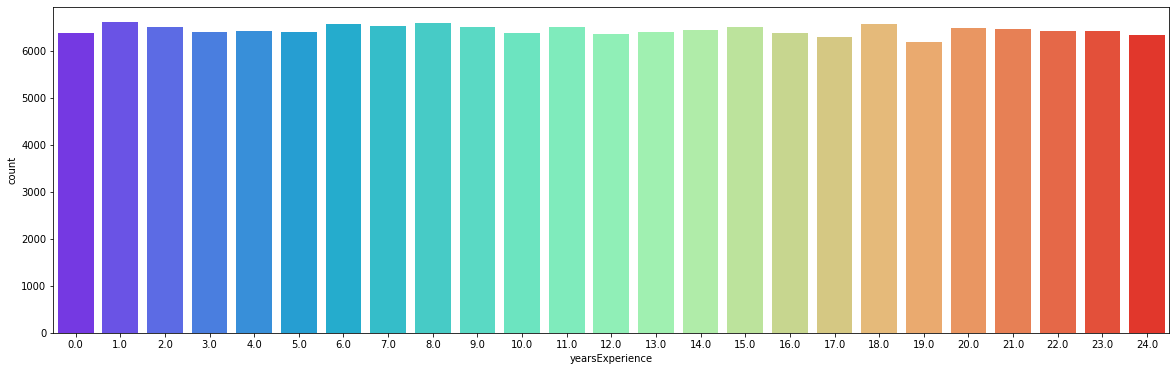

In [ ]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(x='yearsExperience', data=train_data, palette='rainbow')




From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

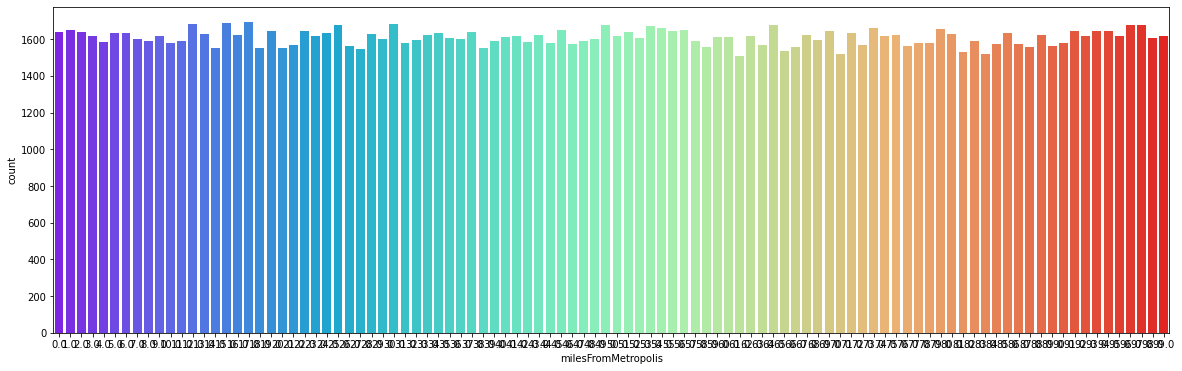

In [ ]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))
sns.countplot(x='milesFromMetropolis',data=train_data,palette='rainbow')




From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

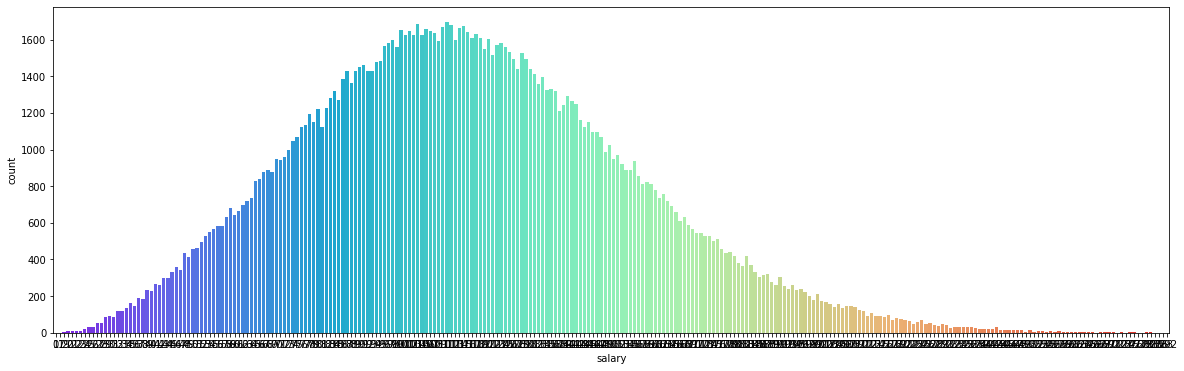

In [ ]:
# count plot of whole datset based on salary
plt.figure(figsize=(20,6))
sns.countplot(x='salary',data=train_data,palette='rainbow')



From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot






plot data on 50000 of 1000000 sample for clear visualization.

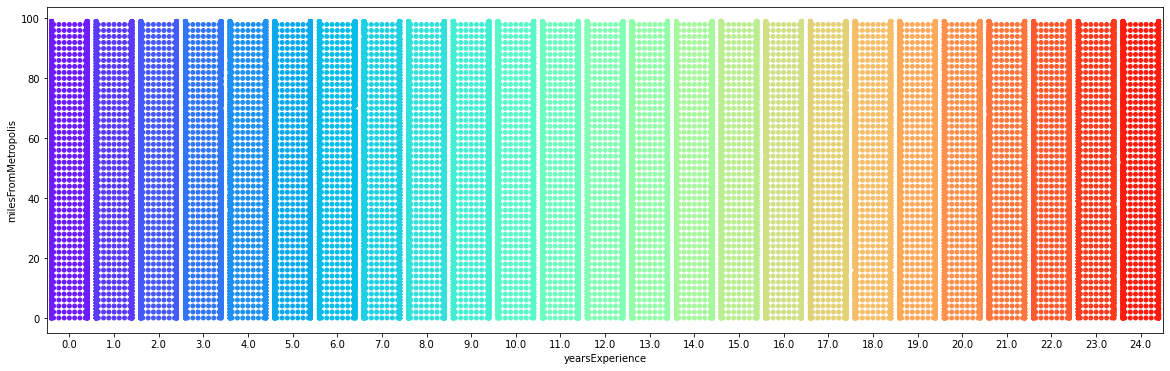

In [ ]:
# swarm plot for yearsExperience and milesFromMetropolis columnsplt.figure(figsize=(20,6)), data=train_data.iloc[1:50000]
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience', y='milesFromMetropolis',data=train_data.iloc[1:50000],palette='rainbow')





From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

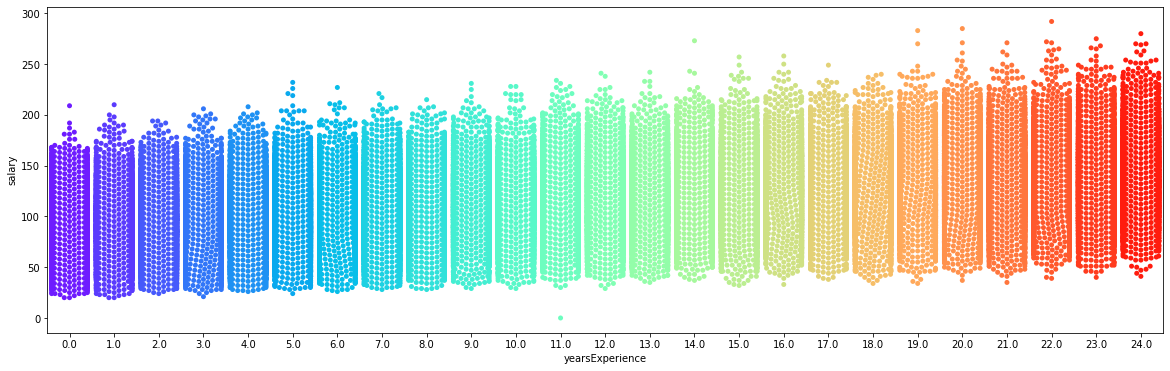

In [ ]:
# swarm plot for yearsExperience and salary columns, data=train_data.iloc[1:50000]

plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience', y='salary',data=train_data.iloc[1:50000],palette='rainbow')




from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

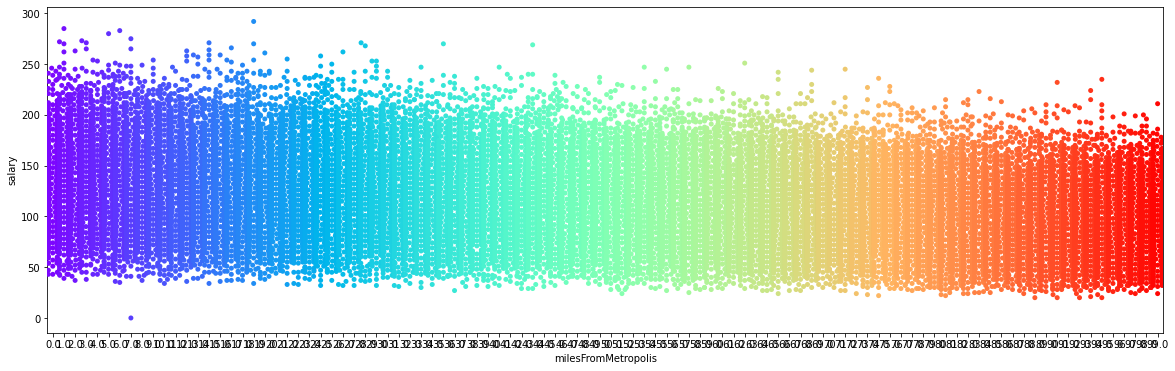

In [ ]:
# swarm plot for milesFromMetropolis and salary columns, data=train_data.iloc[1:50000]
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis', y='salary',data=train_data.iloc[1:50000],palette='rainbow')




from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

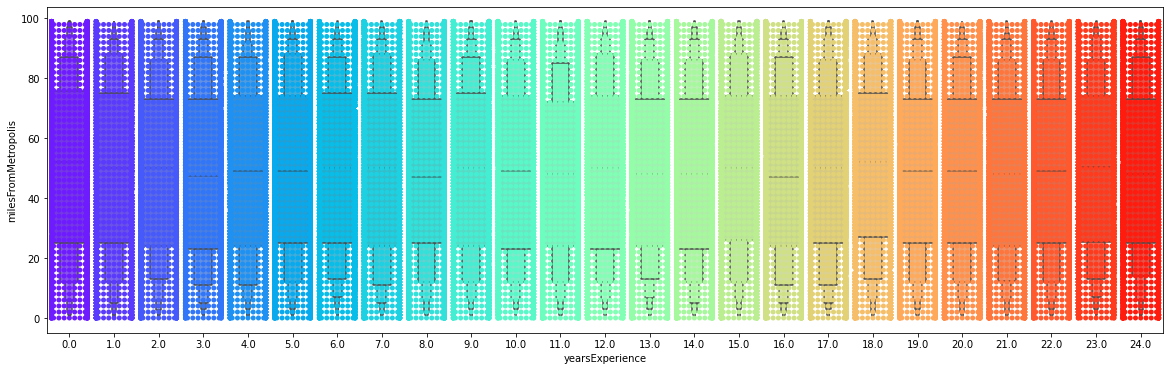

In [ ]:
# combine boxen and swarm plot for yearsExperience and milesFromMetropolis columns, data=train_data.iloc[1:50000]

plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='milesFromMetropolis',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='yearsExperience', y='milesFromMetropolis',data=train_data.iloc[1:50000],palette='rainbow')



From above combine plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

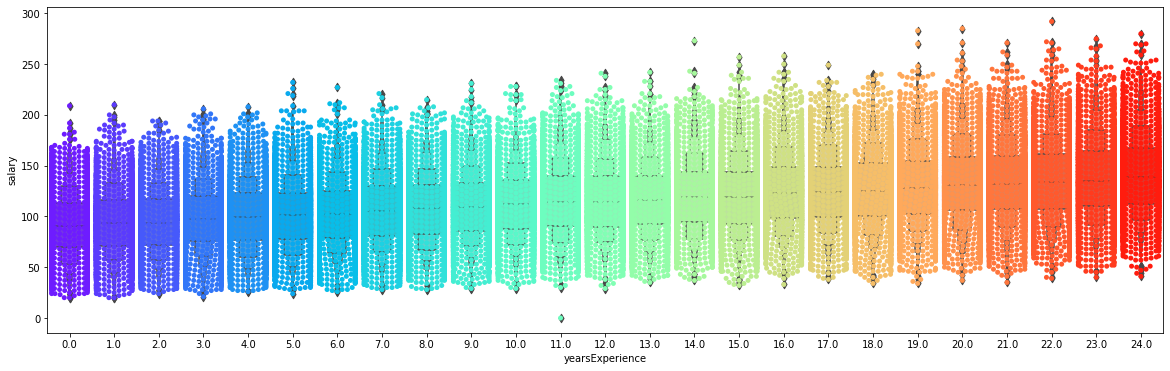

In [ ]:
# combine boxen and swarm plot for yearsExperience and salary columns, data=train_data.iloc[1:50000]
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='salary',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='yearsExperience', y='salary',data=train_data.iloc[1:50000],palette='rainbow')




from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

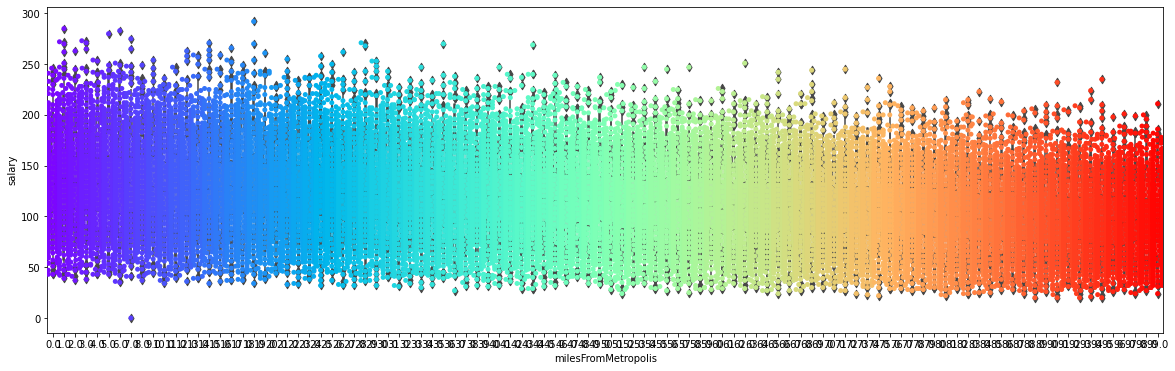

In [ ]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns, data=train_data.iloc[1:50000]
plt.figure(figsize=(20,6))
sns.boxenplot(x='milesFromMetropolis', y='salary',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='milesFromMetropolis', y='salary',data=train_data.iloc[1:50000],palette='rainbow')




from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

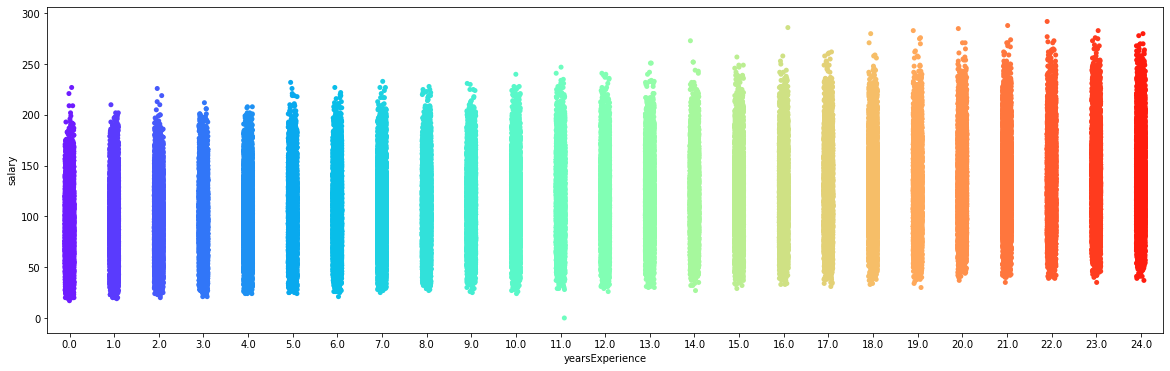

In [ ]:
# strip plot between yearsExperience and salary columns

plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience', y='salary',data=train_data,palette='rainbow')




from above strip plot:

Distribution of values of mileFromMetropolis is equal for each values of yearsExperience

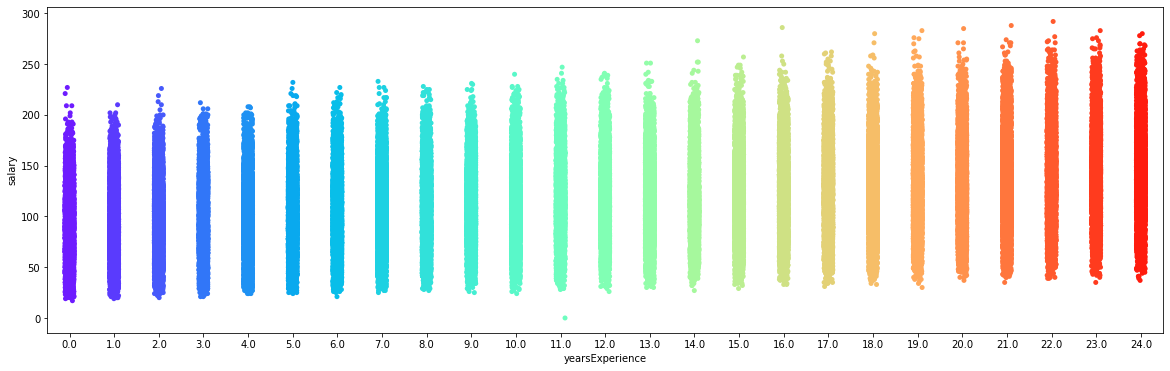

In [ ]:
# strip plot between yearsExperience and salary columns

plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience', y='salary',data=train_data,palette='rainbow')




from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

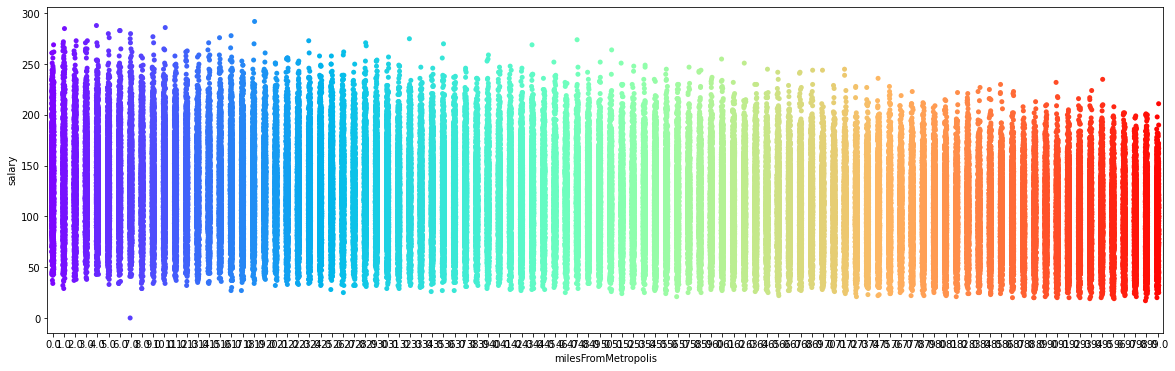

In [ ]:
# strip plot between milesFromMetropolis and salary columns

plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis', y='salary',data=train_data,palette='rainbow')







from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

In [ ]:
# import statsmodle library for vif
import statsmodels.api as sm


In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'],axis=1)

# target values
target = train_data['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names


['yearsExperience', 'milesFromMetropolis']

In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns==names[i]]

  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]

  # firting the OLS model on y and x
  model = sm.OLS(y,x)

  results = model.fit()

  # geting the r^2 value of results.
  rsq =results.rsquared

  # calculating vif value
  vif = round(i/(i-rsq),2)

  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience columns is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is -0.0 

R Square value of milesFromMetropolis columns is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.2 



Observations:

there is colinearity/multicolinearity between
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [ ]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]

  groups = train_anova.groupby(x).count().reset_index()

  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()

  for major in unique_majors:
    # call stats.probplot and plot
      stats.probplot(train_anova[train_anova[x]==major][y],dist="norm",plot=plt)
      plt.title("Probablity Plot - " + str(major))
      plt.show()
  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()

  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
  anova_table =pd.DataFrame(data,columns=['Source of Variation','55','df','MS','F','P.value','F crit'])
  anova_table.set_index('Source of Variation', inplace=True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean()- x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() -1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() -1
  anova_table['df']['Within Groups'] = train_anova.shape[0]-train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F
  F = anova_table['MS']['Between Groups']/ anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cds(F, anova_table['df']['Between Groups']/ anova_table['df']['Within Groups'])

  # F critical
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])
  print(conclusion)

  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY    9278
1     BUSINESS    9416
2    CHEMISTRY    9374
3      COMPSCI    9309
4  ENGINEERING    9442
5   LITERATURE    9450
6         MATH    9205
7         NONE   86227
8      PHYSICS    9310


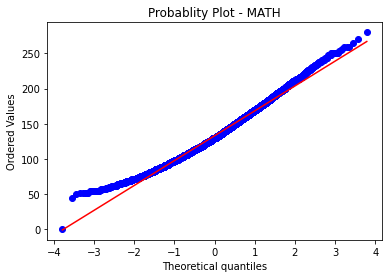

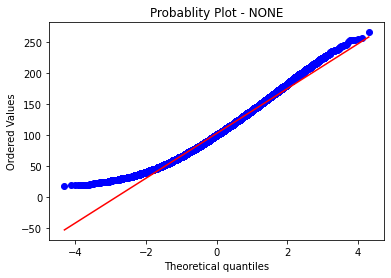

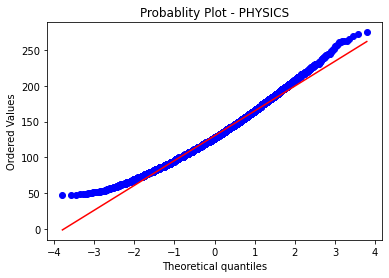

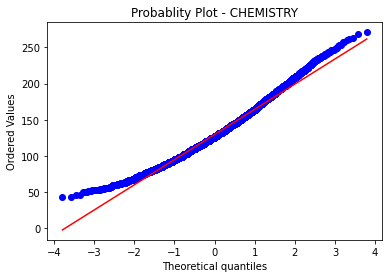

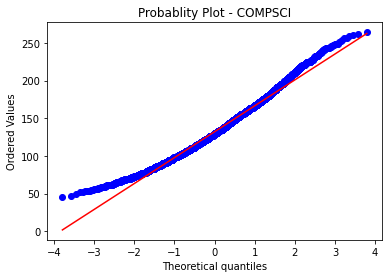

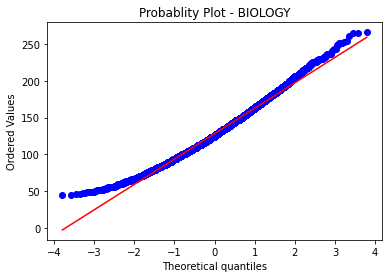

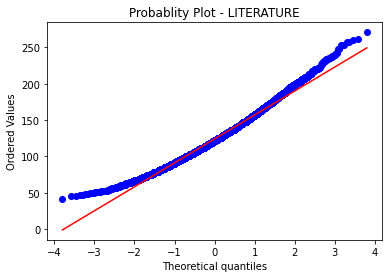

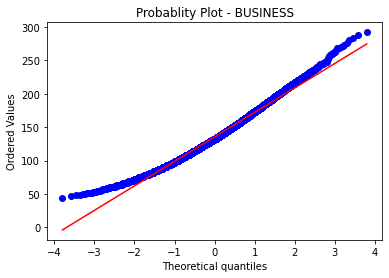

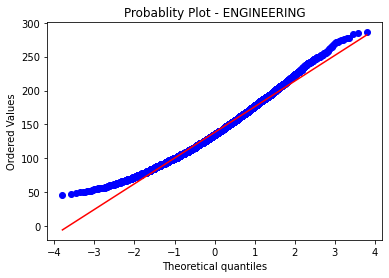

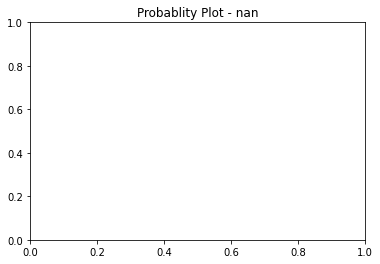

salary    1.147455
dtype: float64


KeyError: ignored

In [ ]:
# perform anova test on major and salary

perform_anova_test('major','salary')



          jobType  salary
0             CEO   20214
1             CFO   19955
2             CTO   20131
3         JANITOR   20355
4          JUNIOR   20022
5         MANAGER   20015
6          SENIOR   20127
7  VICE_PRESIDENT   20193


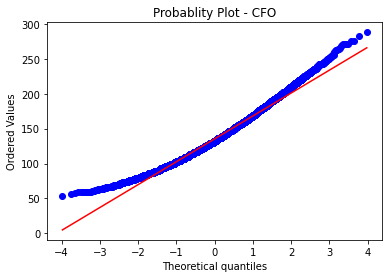

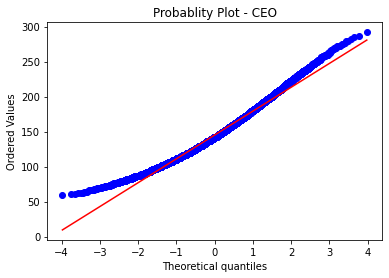

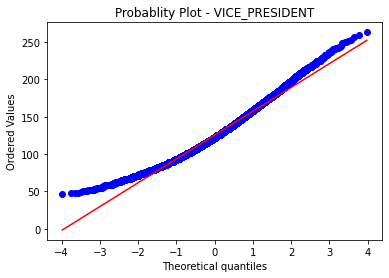

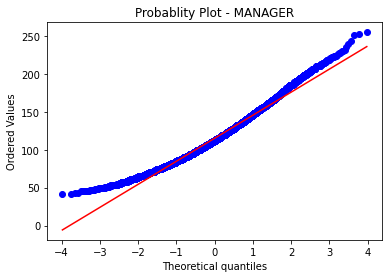

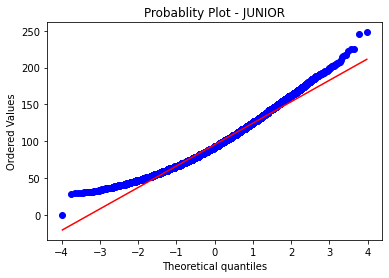

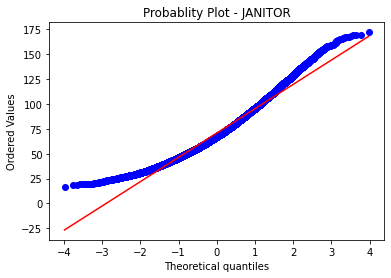

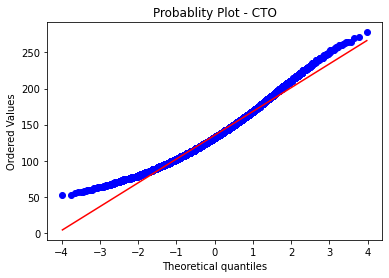

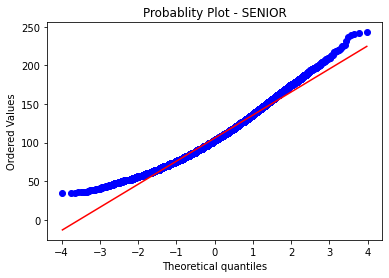

salary    1.384629
dtype: float64


KeyError: ignored

In [ ]:
# perform anova test on jobType and salary

perform_anova_test('jobType','salary')


In [ ]:
# perform anova test on degree and salary

perform_anova_test('degree','salary')



    industry  salary
0       AUTO   23004
1  EDUCATION   22967
2    FINANCE   23130
3     HEALTH   23108
4        OIL   22840
5    SERVICE   23077
6        WEB   22885


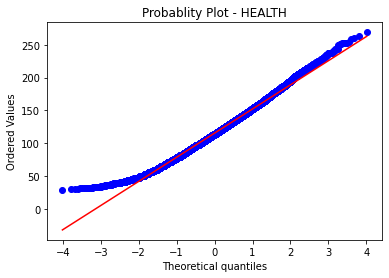

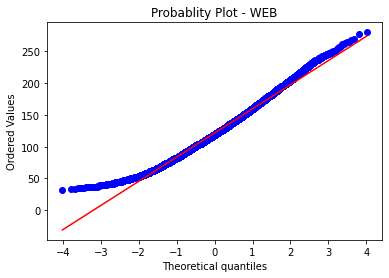

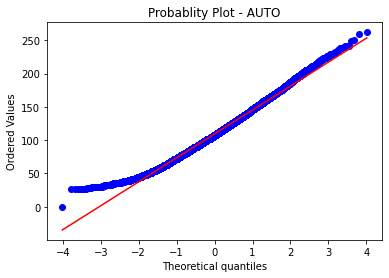

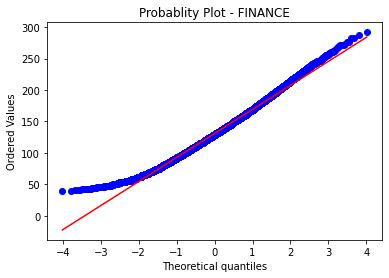

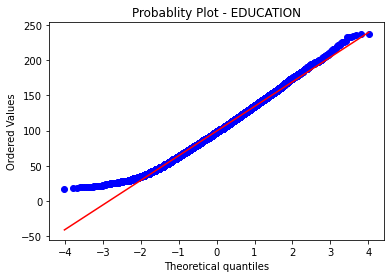

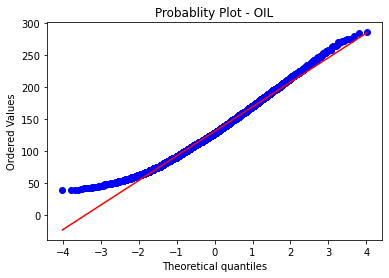

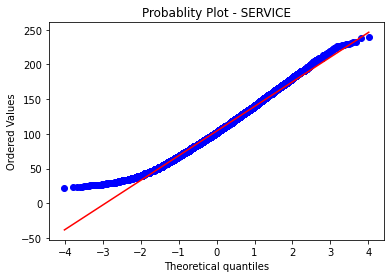

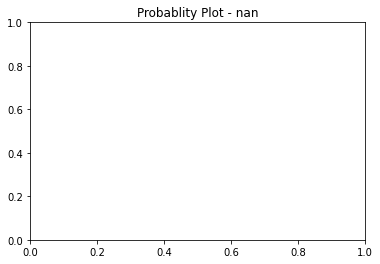

salary    1.098816
dtype: float64


KeyError: ignored

In [ ]:
# perform anova test on industry and salary
perform_anova_test('industry','salary')




          jobType  yearsExperience
0             CEO            20214
1             CFO            19955
2             CTO            20131
3         JANITOR            20354
4          JUNIOR            20022
5         MANAGER            20015
6          SENIOR            20127
7  VICE_PRESIDENT            20193


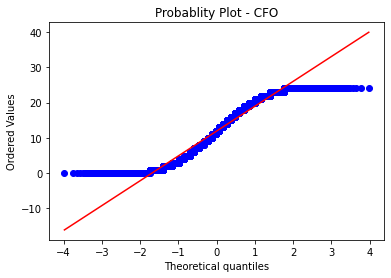

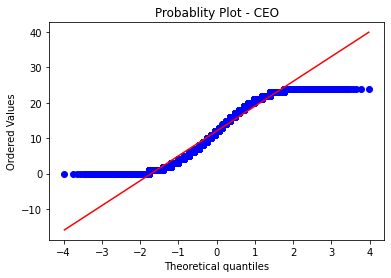

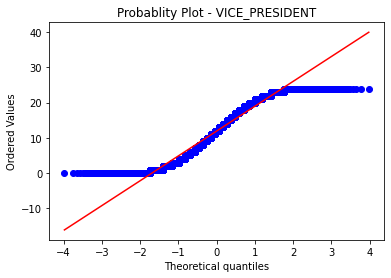

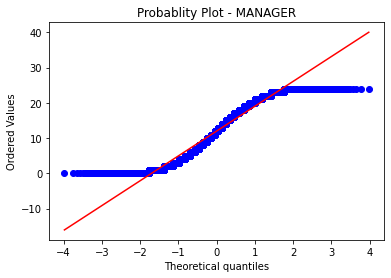

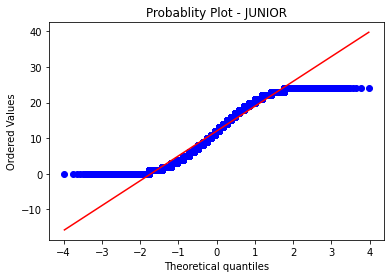

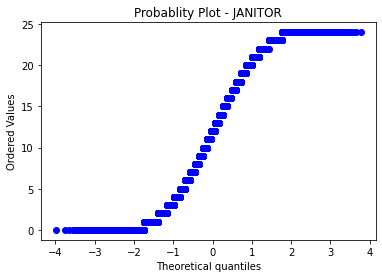

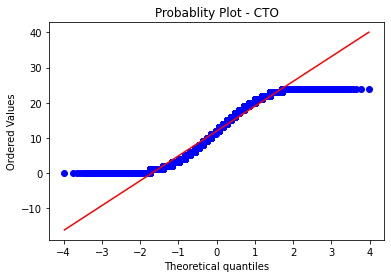

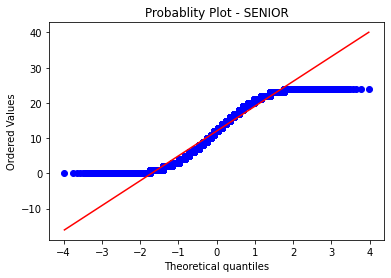

yearsExperience    1.015097
dtype: float64


KeyError: ignored

In [ ]:
# perform anova test on jobType and yearsExperience

perform_anova_test('jobType','yearsExperience')




        degree  yearsExperience
0    BACHELORS            27980
1     DOCTORAL            28107
2  HIGH_SCHOOL            38321
3      MASTERS            28144
4         NONE            38459


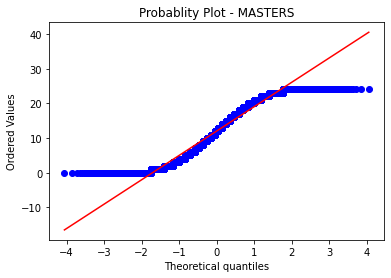

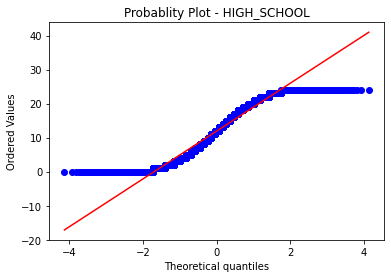

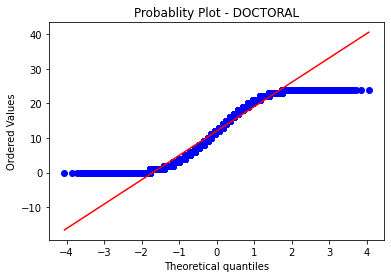

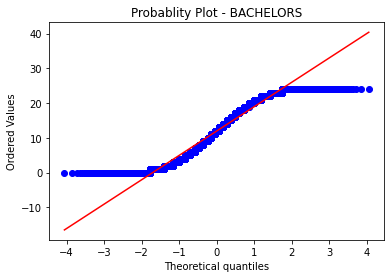

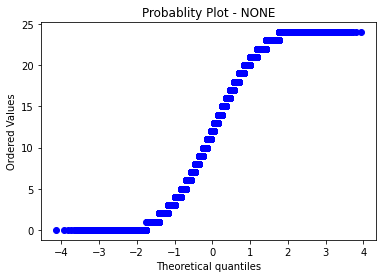

yearsExperience    1.004738
dtype: float64


KeyError: ignored

In [ ]:
# perform anova test on degree and yearsExperience

perform_anova_test('degree','yearsExperience')




         major  yearsExperience
0      BIOLOGY             9278
1     BUSINESS             9416
2    CHEMISTRY             9374
3      COMPSCI             9309
4  ENGINEERING             9442
5   LITERATURE             9450
6         MATH             9205
7         NONE            86227
8      PHYSICS             9310


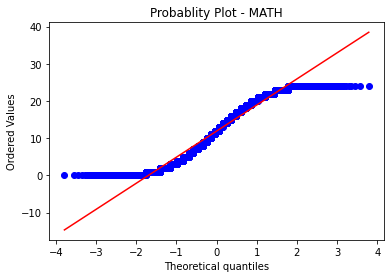

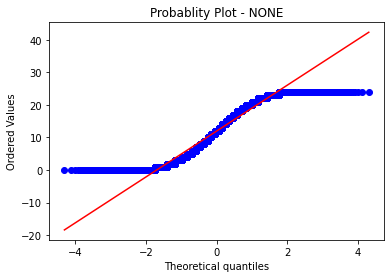

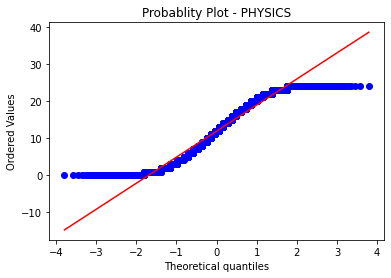

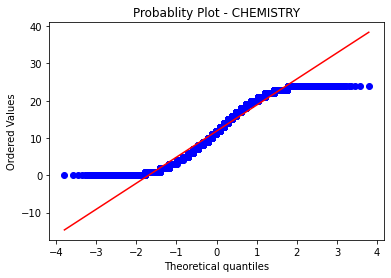

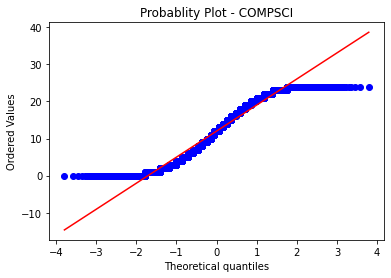

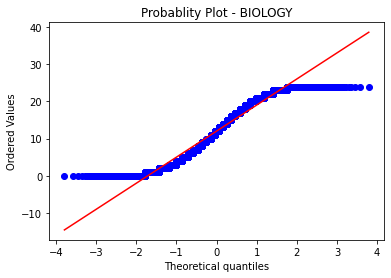

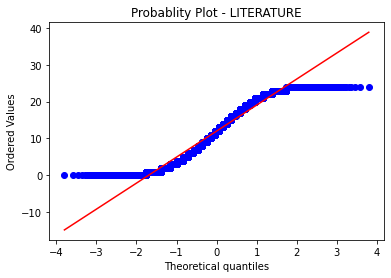

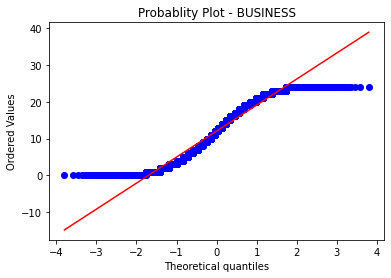

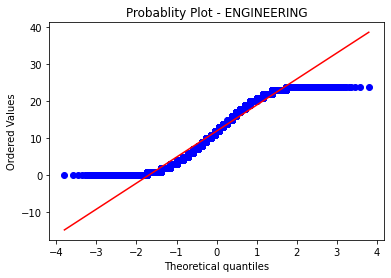

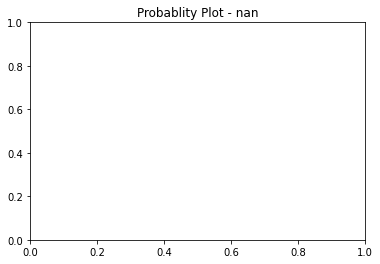

yearsExperience    1.014296
dtype: float64


KeyError: ignored

In [ ]:
# perform anova test on major and yearsExperience
perform_anova_test('major','yearsExperience')



    industry  yearsExperience
0       AUTO            23004
1  EDUCATION            22967
2    FINANCE            23130
3     HEALTH            23108
4        OIL            22840
5    SERVICE            23077
6        WEB            22885


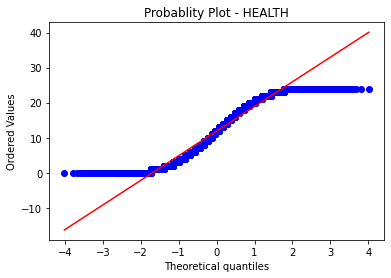

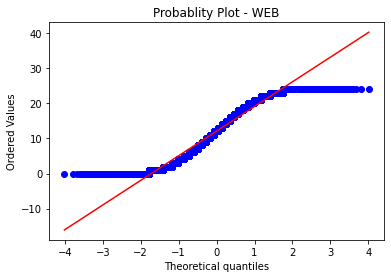

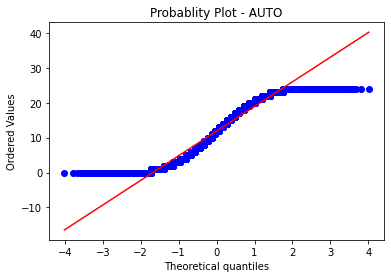

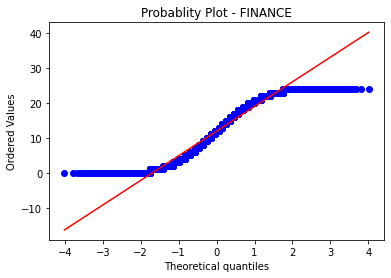

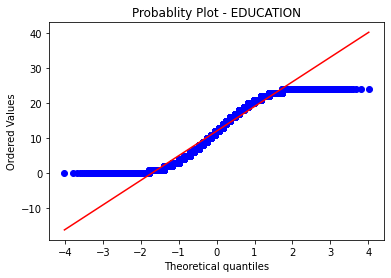

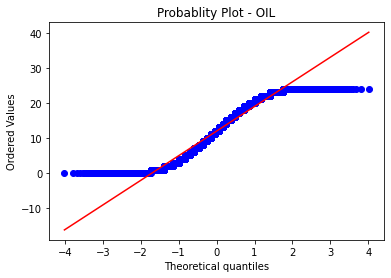

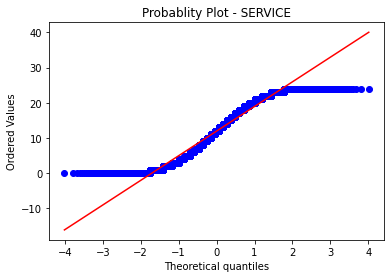

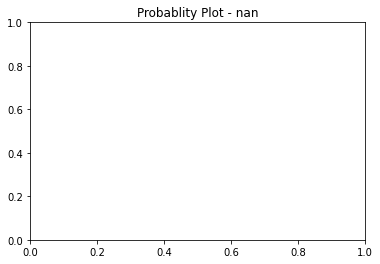

yearsExperience    1.01017
dtype: float64


KeyError: ignored

In [ ]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry','yearsExperience')





## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

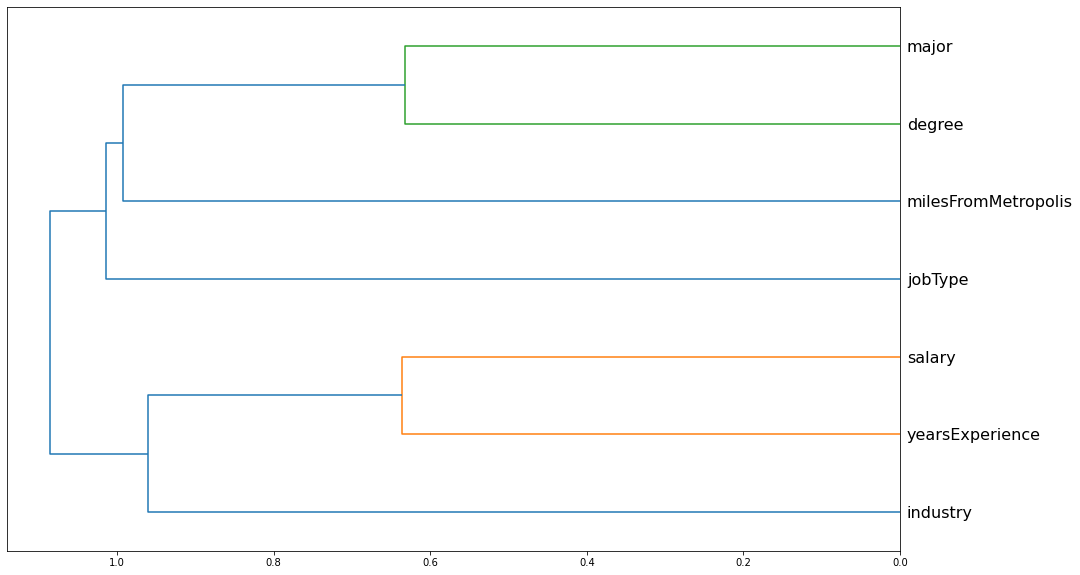

In [ ]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [ ]:
# Making a list of the column names to be scaled
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data,col_train)

# Modelling

### One-hot-encoding


In [ ]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):

    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    # helper function to fit data
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    # helper function to transform data
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder,self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray().columns,index=X.index)
        return d_out

    # helper function to fit and transform data
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    # helper function to get new column names after fitting and tranforming data
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [ ]:
# Split the labels and the target
train_X = train_data.drop(['salary','yearsExperience','milesFromMetropolis'],axis=1)
train_Y = train_data['salary']

In [ ]:
# Features
train_X.head()


jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [ ]:
# Target
train_Y.head()



0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [ ]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()




TypeError: ignored

In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X,train_Y,test_size=0.2)

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())



# Function for calculating all the relevant metrics
def print_score(m):
    res = [rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test),Y_test),
           m.score(X_train,Y_train),m.score(X_test,Y_test),
           median_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test),
           ]

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):

    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importance
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.contact([feature_importance_df,_df],
                                        axis=0,ignore_index=True)



    # grouping all data and sorting in descending order
    order = feature_importance_df.gropuby('column')\
    .sum()[[feature_importance]]\
    .sort_values('feature_importance',ascending=False).index[:50]


    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8,max(6,len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                  x-'feature_importance',
                  y='column',
                  order=order,
                  ax=ax
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('importance')
    ax.grid()
    fig.tight_layout()


    return fig, ax


SyntaxError: ignored

### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
  from sklearn.linear_model import LinearRegression


# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data

lModel.fit(X_train,Y_train)

# print score of the model
print_score(lModel)


# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_,train_X)


IndentationError: ignored

### Random Forest Regressor

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor


# Instantiate the model
rf= RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model

print_score(rf)

# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X.iloc[1:50000])

ValueError: ignored

### KNeighbors Regressor

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [ ]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighbourRegressor

# Instantiate the model
knnr = KNeighbourRegressor()

# print score of the model
knnr.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])


# print score of the model
  print_score(knnr)


IndentationError: ignored

### Gradient Boosting Regressor

In [ ]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Instantiate the model
GBR = GradientBoostingRegressor()

GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])



# print score of the model
  print_score(GBR)


# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])



IndentationError: ignored

### DecisionTree Regressor

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.ensemble import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()

# Instantiate the model
DTR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model
print_score(DTR)



ImportError: ignored

### AdaBoost Regressor

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor


# Instantiate the model
AdaBoost = AdaBoostRegressor()


# Instantiate the model

AdaBoost.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model
print_score(AdaBoost)


# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_,train_X.iloc[1:50000])


# visualizing the importance of features.


ValueError: ignored

### XGBoost

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor


# Instantiate the model
xgbr = XGBRegressor()


# Fit the model to the data

xgbr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model

print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_,train_X.iloc[1:50000])



ValueError: ignored

### Light Gradient Boosted Machine

In [ ]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lg = lgbm.LGBMRegressor()


# Fit the model to the data
lg.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])


# print score of the model
print_score(lg)


# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_,train_X.iloc[1:50000])


ValueError: ignored

### Comparing all the model based on metric

In [ ]:
def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, create a list with the objects
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}

    df_train = pd.DataFrame(data)

    df_test = pd.DataFrame(data)


    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test)

       # then predict on the test set
      res = [rmse(model.predict(X_train),y_train),rmse(model.predict(X_test),y_test),
             metrics.median_absolute_error(model.predict(X_train),y_train),metrics.median_absolute_error(model.predict(X_test),Y_test),
             metrics.r2_score(model.predict(X_train),y_train),etrics.r2_score(model.predict(X_test),Y_test)]

      df_train[name] = [res[0],res[2],res[4],res[6]]

      df_test[name] = [res[1],res[3],res[5],res[7]]

    return df_train,df_test

In [ ]:
# list of models object
# list of models name
models= [lg,DTR,rf,knnr,GBR, xgbr,AdaBoost]

names = ['Lr','Dtree','Forest','Knn','GBR','Xboost','AdaBoost']

comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)


NameError: ignored

#### RMSE of all model on train and test data

In [ ]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])


NameError: ignored

#### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test

print("Results on test data")
comp_model_test



Results on test data


NameError: ignored

## Hyperparameter Tunning



### RamdomizedSearchCV

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation,
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator=model,pafram_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state-42,n_jobs=-1)

  # Fit the random search model
  random.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

  print(random.best_params_)

SyntaxError: ignored

In [ ]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_search(RandomForestRegressor(),x_train,y_train,param_grid=rf_para_grid)




NameError: ignored

In [ ]:
# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200],
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True),
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv
random_search(GradientBoostRegressor(),x_train,y_train,param_grid=GBR_para_grid)




NameError: ignored

In [ ]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv

random_search(DecisionTreeRegressor(),x_train,y_train,param_grid=DTR_para_grid)





NameError: ignored

In [ ]:
# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4]
 }

# passing data for hyper parameter tunning with Randomized search cv

random_search(XGBRegressor(),x_train,y_train,param_grid=XGB_para_grid)




NameError: ignored

## Using the best parameters and training the models

### Random Forest Regressor

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= RandomForestRegressor(**{'n_estimators':64.'min_samples_leaf':0.1,'max_features':'auto','max_depth':27.0,'bootstrap':False})


# Fit the model to the data
rf.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])


# print score of the model

print_score(rf)

# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X.iloc[1:1000])


SyntaxError: ignored

### Gradient Boosting Regressor

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingRegressor
# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators':150,'max_depth':8.0,'learning_rate':0.25})

GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])

ValueError: ignored

### Decision Tree Regrsessor

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
DTR = DecisionTreeRegressor(**{'spiltter':'random','min_height_fraction_leaf':0.1,'min_sample_leaf':0.2,'max_depth':5.0,'max_features':None})

# Instantiate the model

DTR.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])

# print score of the model
print_score(DTR)


NameError: ignored

### XGBoost Regressor

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgbr = XGBRegressor(**{'min_child_weight':3,'learning_rate=':0.15,'gamma':0.1,'colsample_bytree':0.4})

# Fit the model to the data

xgbr.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])

# print score of the model
print_score(xgbr)


# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_,train_X.iloc[1:10000])


ValueError: ignored

## Comparing the metrics for tuned models

In [ ]:

models= [DTR,rf,GBR, xgbr]

names = ['Dtree','Forest','GBR','Xboost']

comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)


NameError: ignored

In [ ]:
print("Metrics on train data")
comp_model_train

Metrics on train data


NameError: ignored

In [ ]:
print("Metrics on test data")
comp_model_test



### Now working with the test dataset provided

In [ ]:
# test data
test_X = test_data
test_X


jobId  salary
0       JOB1362684407687     130
1       JOB1362684407688     101
2       JOB1362684407689     137
3       JOB1362684407690     142
4       JOB1362684407691     163
...                  ...     ...
406309  JOB1362684813996     134
406310  JOB1362684813997     128
406311  JOB1362684813998      88
406312  JOB1362684813999     182
406313  JOB1362684814000     101

[406314 rows x 2 columns]

In [ ]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_X = scale_data(test_X,col_test)


KeyError: ignored

In [ ]:
# passing test dataset for one hot encoding process
encoder = onehotencoder()

test_drop =test_X.drop(['jobType','degree','major','industry'],axis=1)

test_X = encoder.fit transform(test_X.drop(['yearsExperience','milesFromMetropolis'],axis=1))
test_X = test_X.join(test drop(['yearsExperience'])
test_X = test_X.join(test drop(['milesFromMetropolis'])
test_X.head()



SyntaxError: ignored

In [ ]:
# Perforn the prediction on the test dataset
y_predicted =GBR.predict(test_X)
y_predicted



ValueError: ignored

In [ ]:
# creating a dataframe of predicted results
predictions = pd.DataFrame(y_predicted)


NameError: ignored

In [ ]:
# predicted values in dataframe
predictions


NameError: ignored

### Conclusion
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.